<!-- snippet from http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/ -->
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

## Intro
Modified names, removed primal/mega, misterious transformed in legendaries

In [37]:
pkm_dataset_url = "data/Pokemon.csv"
pkm_matchup_url = "data/PokeTypeMatchupData.csv"

In [38]:
#pkm_df = pd.read_csv(pkm_dataset_url)
pkm_df = pd.read_csv("data/Pokemon.csv")
pkm_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [39]:
#pkm_mu_df = pd.read_csv(pkm_matchup_url)
pkm_mu_df = pd.read_csv("data/PokeTypeMatchupData.csv")
print(pkm_mu_df.head())
pkm_mu_df.info()

         Name Number Normal  Fire Water Electric  Grass   Ice Fighting Poison  \
0   Bulbasaur   #001     *1    *2  *0.5     *0.5  *0.25    *2     *0.5     *1   
1     Ivysaur   #002     *1    *2  *0.5     *0.5  *0.25    *2     *0.5     *1   
2    Venusaur   #003     *1    *2  *0.5     *0.5  *0.25    *2     *0.5     *1   
3  Charmander   #004     *1  *0.5    *2       *1   *0.5  *0.5       *1     *1   
4  Charmeleon   #005     *1  *0.5    *2       *1   *0.5  *0.5       *1     *1   

  Ground Flying Psychic   Bug Rock Ghost Dragon Dark Steel Fairy  
0     *1     *2      *2    *1   *1    *1     *1   *1    *1  *0.5  
1     *1     *2      *2    *1   *1    *1     *1   *1    *1  *0.5  
2     *1     *2      *2    *1   *1    *1     *1   *1    *1  *0.5  
3     *2     *1      *1  *0.5   *2    *1     *1   *1  *0.5  *0.5  
4     *2     *1      *1  *0.5   *2    *1     *1   *1  *0.5  *0.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   C

# Preprocessing

In [40]:
typesN = ["Type 1", "Type 2"]
stats = ["HP", "Attack", "Defense", "Sp Atk", "Sp Def", "Speed", "Total"]

In [41]:
# Pokemon matchup dataset
#Remove asterisks before the multiplier and setup data types
pkm_mu_df.replace(to_replace = "[#, *]", value = "", regex = True, inplace = True)
pkm_mu_df["Number"] = pkm_mu_df["Number"].astype(int)

types = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice", "Fighting", "Poison", "Ground", "Flying",
        "Psychic", "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"]
pkm_mu_df[types]=pkm_mu_df[types].astype(float)

pkm_mu_df.head()

KeyError: "None of [Index(['Type 1', 'Type 2'], dtype='object')] are in the [columns]"

In [ ]:
pkm_df["Type 2"].fillna(value='None', inplace=True)
pkm_df.head()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


In [ ]:
#some pokemon have multiple forms
pkm_df.tail()

,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
742,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True
743,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
744,720,Hoopa-Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
745,720,Hoopa-Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
746,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


,N,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Form
742,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True,None
743,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,None
744,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Confined
745,720,Hoopa,Psychic,Dark,680,80,160,60,170,130,80,6,True,Unbound
746,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,None


In [ ]:
pkm_df = pkm_df[["N", "Name", "Form", "Generation"] + typesN + stats + ["Legendary"]]
pkm_df.head()

,N,Name,Form,Generation,Type 1,Type 2,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,Legendary
0,1,Bulbasaur,None,1,Grass,Poison,45,49,49,65,65,45,318,False
1,2,Ivysaur,None,1,Grass,Poison,60,62,63,80,80,60,405,False
2,3,Venusaur,None,1,Grass,Poison,80,82,83,100,100,80,525,False
3,4,Charmander,None,1,Fire,None,39,52,43,60,50,65,309,False
4,5,Charmeleon,None,1,Fire,None,58,64,58,80,65,80,405,False


# Exploration

## Pokemon distribution per gen and legendary

In [ ]:
pkm_rarity_df = pkm_df.rename(columns={"Legendary":"Rarity"}).replace({"Rarity": {False: "Common", True: "Legendary"}})
pkm_rarity_df = pkm_rarity_df[["N", "Name", "Generation", "Rarity"]].drop_duplicates()
pkm_rarity_df.head()

,N,Name,Generation,Rarity
0,1,Bulbasaur,1,Common
1,2,Ivysaur,1,Common
2,3,Venusaur,1,Common
3,4,Charmander,1,Common
4,5,Charmeleon,1,Common


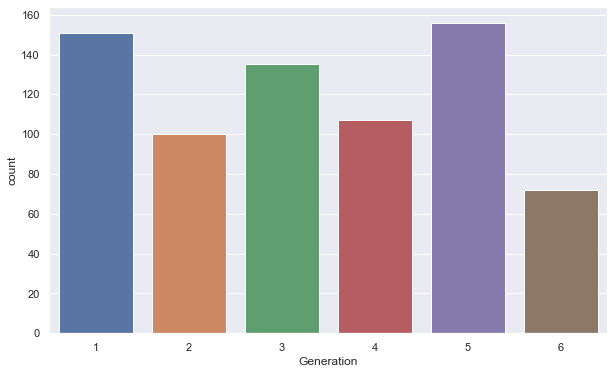

In [ ]:
#Pokemon in each generation
plt.figure(figsize=(10,6))
sns.countplot(x="Generation", data=pkm_rarity_df)
plt.show()

      Rarity      Rate
0     Common  0.927878
1  Legendary  0.072122


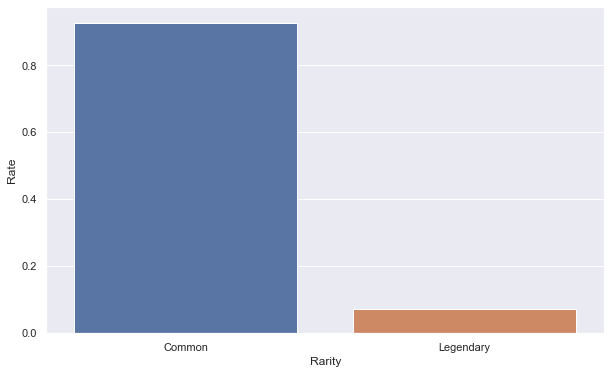

In [ ]:
#Legendary Rate
pkm_rarity_distr_df = pkm_rarity_df[["Rarity"]].value_counts(normalize=True).reset_index(name="Rate")
print(pkm_rarity_distr_df)
plt.figure(figsize=(10,6))
sns.barplot(y="Rate", x="Rarity", data=pkm_rarity_distr_df)
plt.show()

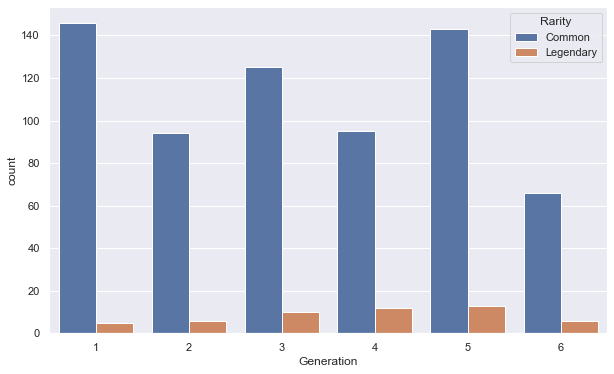

In [ ]:
#Pokemon common and legendary in each generation
plt.figure(figsize=(10,6))
sns.countplot(x="Generation", hue="Rarity", data=pkm_rarity_df)
plt.show()


    Generation     Rarity      Rate
0            1     Common  0.966887
1            1  Legendary  0.033113
2            2     Common  0.940000
3            2  Legendary  0.060000
4            3     Common  0.925926
5            3  Legendary  0.074074
6            4     Common  0.887850
7            4  Legendary  0.112150
8            5     Common  0.916667
9            5  Legendary  0.083333
10           6     Common  0.916667
11           6  Legendary  0.083333


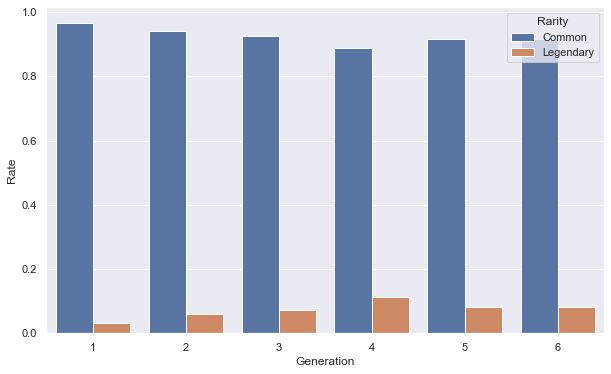

In [ ]:
pkm_rarity_gen_df = pkm_rarity_df.groupby(["Generation","Rarity"]).size().reset_index(name="Rate")
s = pkm_rarity_df["Generation"].value_counts()
pkm_rarity_gen_df["Rate"] = pkm_rarity_gen_df["Rate"].div(pkm_rarity_gen_df['Generation'].map(s))

print(pkm_rarity_gen_df)

plt.figure(figsize=(10,6))
sns.barplot(y="Rate", x="Generation", hue="Rarity", data=pkm_rarity_gen_df)
plt.show()

## Types distribution

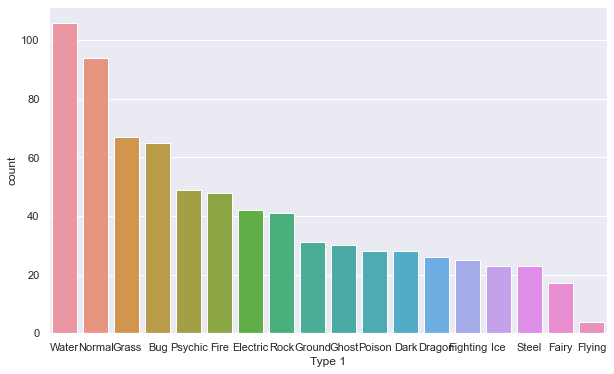

In [ ]:
#Pokemon per Type 1
plt.figure(figsize=(10,6))
sns.countplot(x="Type 1", data=pkm_df, order=pkm_df["Type 1"].value_counts().index)
plt.show()

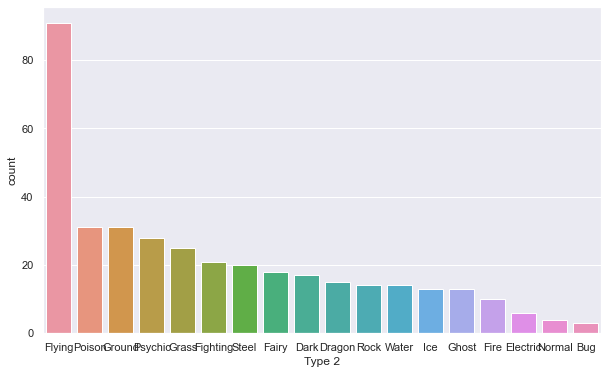

In [ ]:
#Pokemon per Type 2
plt.figure(figsize=(10,6))
sns.countplot(x="Type 2", data=pkm_df, order=pkm_df["Type 2"].value_counts().index)
plt.show()

In [ ]:
pkm_gen_type_df = pkm_df.groupby(["Generation","Type 1"]).size().reset_index(name="Quantity")

idx = pkm_gen_type_df.groupby(["Generation"])["Quantity"].transform(max) == pkm_gen_type_df["Quantity"]

pkm_gen_type_df[idx].reset_index(drop=True)

,Generation,Type 1,Quantity
0,1,Water,28
1,2,Water,18
2,3,Water,24
3,4,Normal,17
4,5,Bug,18
5,5,Normal,18
6,5,Water,18
7,6,Ghost,10
